# **Spaceship Titanic**

In [96]:
#------Importing libraries------->
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
#------Importing Data------->
train=pd.read_csv("/content/drive/MyDrive/Spaceship titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Spaceship titanic/test.csv")
sample=pd.read_csv("/content/drive/MyDrive/Spaceship titanic/sample_submission.csv")

In [98]:
#------Checking Data------->
print(train.head(),"\n")
print(train.isna().sum(),"\n\n")
print(test.head(),"\n")
print(test.isna().sum())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True   



In [99]:
print(train.columns,"\n")
print(test.columns,"\n")

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object') 

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object') 



In [100]:
#------Data Cleaning------->
def clean(data):
  data = data.drop(['PassengerId','Cabin','Name','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],axis=1)
  data['VIP'] = np.where(data['VIP'] == False , 0 ,1)
  data['CryoSleep'] = np.where(data['CryoSleep'] == False , 0 ,1)
  data['Age'].fillna(data['Age'].median() , inplace=True)
  data = data.dropna(subset=['HomePlanet','Destination'])

  return data

df = clean(train)
df['Transported'] = np.where(df['Transported'] == False , 0 , 1)
df1 = clean(test)

print(df.groupby("Destination")["HomePlanet"].value_counts())

def code_embark(row):
    if row == " Europa " or row== "55 Cancri e":
        return 0
    elif row == "Earth"or row== "PSO J318.5-22":
        return 1
    else:
        return 2

df['HomePlanet']  = df['HomePlanet'].apply(code_embark)
df1['HomePlanet']  = df1['HomePlanet'].apply(code_embark)
df['Destination']  = df['Destination'].apply(code_embark)
df1['Destination']  = df1['Destination'].apply(code_embark)

print(df.isna().sum(),"\n")
print("Train Data Shape -->",df.shape,"\nTest Data Shape -->",df1.shape,"\n\n")
print(df.head(),"\n\n\n",df1.head())

Destination    HomePlanet
55 Cancri e    Europa         886
               Earth          690
               Mars           193
PSO J318.5-22  Earth          712
               Mars            49
               Europa          19
TRAPPIST-1e    Earth         3101
               Mars          1475
               Europa        1189
Name: HomePlanet, dtype: int64
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64 

Train Data Shape --> (8314, 6) 
Test Data Shape --> (4100, 5) 


   HomePlanet  CryoSleep  Destination   Age  VIP  Transported
0           2          0            2  39.0    0            0
1           1          0            2  24.0    0            1
2           2          0            2  58.0    1            0
3           2          0            2  33.0    0            0
4           1          0            2  16.0    0            1 


    HomePlanet  CryoSleep  Destination   Age  VIP
0           1          1      

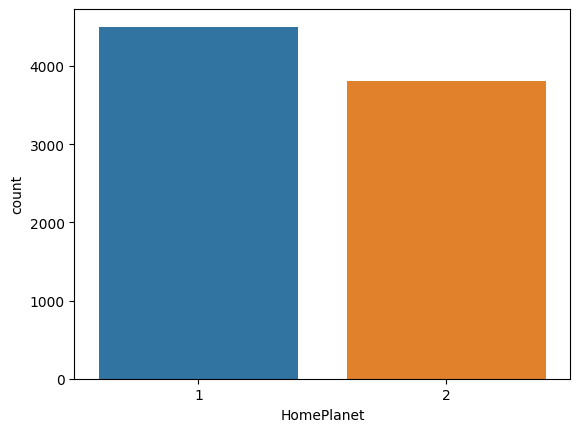

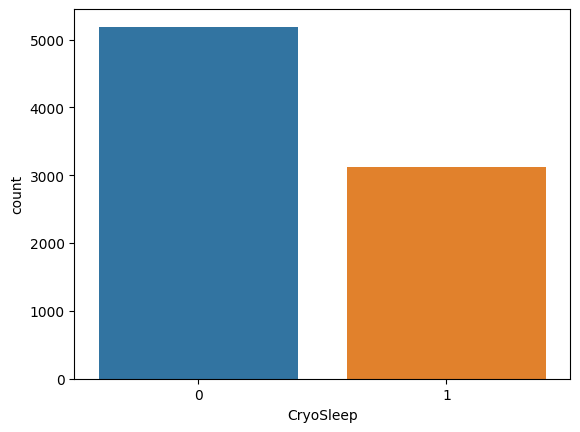

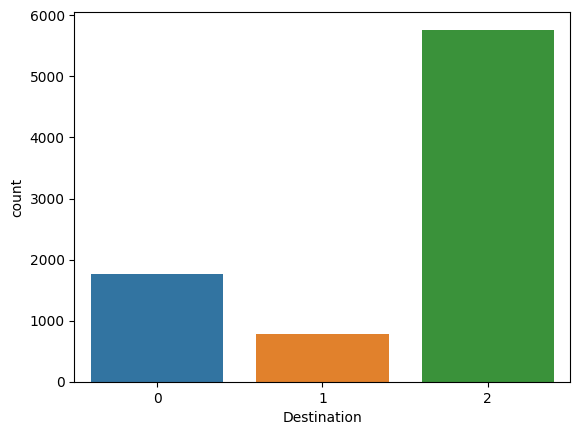

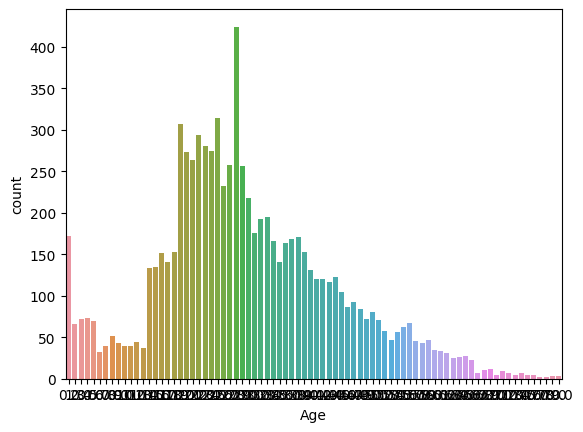

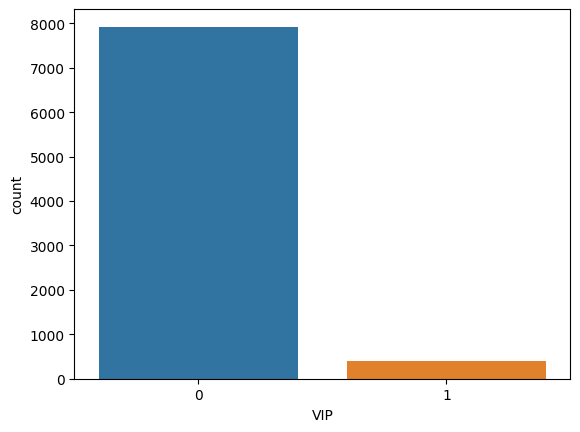

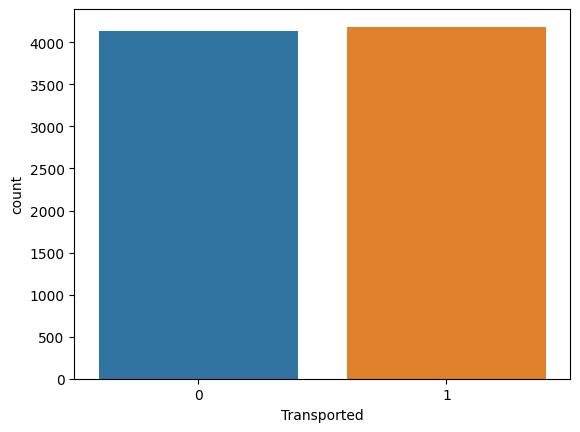

In [101]:
#---------------Visualization---------->
def count_plot(feature):
    sns.countplot(x=feature, data=df)
    plt.show()
    print("\n\n")
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported']
for i in columns:
    count_plot(i)

             HomePlanet  CryoSleep  Destination       Age       VIP  \
HomePlanet     1.000000   0.104938    -0.072476  0.204089  0.112806   
CryoSleep      0.104938   1.000000    -0.090964 -0.077012 -0.049640   
Destination   -0.072476  -0.090964     1.000000 -0.006870 -0.032555   
Age            0.204089  -0.077012    -0.006870  1.000000  0.057571   
VIP            0.112806  -0.049640    -0.032555  0.057571  1.000000   
Transported    0.172199   0.447989    -0.108751 -0.076967 -0.023705   

             Transported  
HomePlanet      0.172199  
CryoSleep       0.447989  
Destination    -0.108751  
Age            -0.076967  
VIP            -0.023705  
Transported     1.000000  


<Axes: >

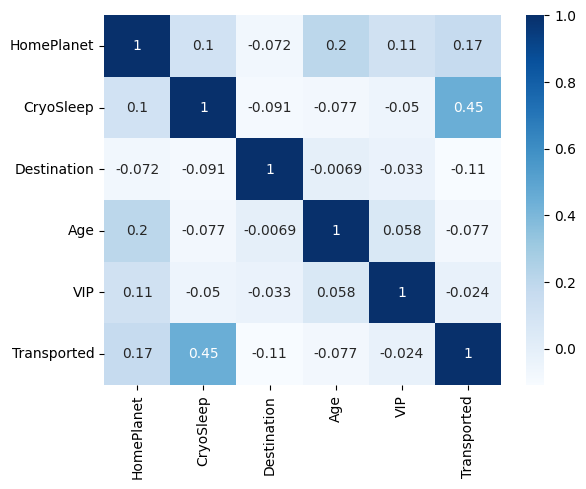

In [102]:
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [103]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X = df.drop("Transported", axis=1)
Y = df["Transported"]

In [112]:
print("-------------------------Model  Random Forest-----------------------")
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest = RandomForestClassifier()
forest.fit(X, Y)
print("Score : ",forest.score(X, Y)*100 , "%")
expected = Y
predicted = forest.predict(X)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model  Random Forest-----------------------
Score :  75.8479672840991 %
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      4129
           1       0.82      0.67      0.74      4185

    accuracy                           0.76      8314
   macro avg       0.77      0.76      0.76      8314
weighted avg       0.77      0.76      0.76      8314

[[3513  616]
 [1392 2793]]


In [122]:
print("-------------------------Model  KNN-----------------------")
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.43)
knn.fit(X_train, Y_train)

print("Accuracy: ", knn.score(X_test, Y_test) * 100)

expected = Y
predicted = knn.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model  KNN-----------------------
Accuracy:  68.42841163310962
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      4129
           1       0.72      0.68      0.70      4185

    accuracy                           0.71      8314
   macro avg       0.71      0.71      0.71      8314
weighted avg       0.71      0.71      0.71      8314

[[3040 1089]
 [1339 2846]]


In [132]:
print("-------------------------Model SVM-----------------------")
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Split  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Score :", (accuracy_score(y_test, y_pred))*100,"%")

expected = Y
predicted = svm.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model SVM-----------------------
Score : 72.27901383042695 %
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      4129
           1       0.74      0.67      0.71      4185

    accuracy                           0.72      8314
   macro avg       0.72      0.72      0.72      8314
weighted avg       0.72      0.72      0.72      8314

[[3158  971]
 [1366 2819]]


In [138]:
print("-------------------------Model Naive Gauss-----------------------")
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Score :", (accuracy_score(y_test, y_pred))*100,"%")

expected = Y
predicted = nb.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model Naive Gauss-----------------------
Score : 70.29107529468367 %
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      4129
           1       0.74      0.64      0.69      4185

    accuracy                           0.70      8314
   macro avg       0.71      0.71      0.70      8314
weighted avg       0.71      0.70      0.70      8314

[[3182  947]
 [1508 2677]]


In [145]:
print("-------------------------Model Logistic R-----------------------")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7)
lr.fit(X_train, Y_train)

print("Accuracy: ", lr.score(X_test, Y_test) * 100)

expected = Y
predicted = lr.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model Logistic R-----------------------
Accuracy:  71.1512027491409
              precision    recall  f1-score   support

           0       0.67      0.84      0.75      4129
           1       0.79      0.60      0.68      4185

    accuracy                           0.72      8314
   macro avg       0.73      0.72      0.71      8314
weighted avg       0.73      0.72      0.71      8314

[[3453  676]
 [1674 2511]]
